## Exercise- Analyzing Data science Job Demand

In [2]:
import pandas as pd
from datasets import load_dataset

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)

In [3]:
df_india = df[df["job_country"] == 'India'].copy()

In [4]:
df_india['job_posted_month'] = df_india['job_posted_date'].dt.strftime('%B')
df_india['job_posted_month']

16            June
19           April
29           March
38            July
42        November
            ...   
785712       March
785715       March
785716       March
785718       March
785740       March
Name: job_posted_month, Length: 51088, dtype: object

In [5]:
df_india_pivot = df_india.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,170,32,418,1566,946,54,86,375,194,169
August,189,25,618,1407,1157,47,126,343,235,148
December,186,27,648,1464,1206,94,77,343,200,133
February,143,35,433,1631,932,42,94,313,165,157
January,175,31,628,2132,1444,70,127,448,269,192
July,142,25,457,1528,1123,54,75,359,204,155
June,146,26,367,1632,1129,41,66,427,238,125
March,116,37,422,1591,1005,34,96,351,194,180
May,103,14,278,1384,837,31,59,329,134,98


In [6]:
df_india_pivot.reset_index(inplace=True)
df_india_pivot['month_no'] = pd.to_datetime(df_india_pivot['job_posted_month'],format='%B').dt.month

df_india_pivot.sort_values('month_no', inplace=True)
df_india_pivot.set_index('job_posted_month',inplace=True)
df_india_pivot.drop(columns='month_no',inplace=True)

In [7]:
df_india_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,175,31,628,2132,1444,70,127,448,269,192
February,143,35,433,1631,932,42,94,313,165,157
March,116,37,422,1591,1005,34,96,351,194,180
April,170,32,418,1566,946,54,86,375,194,169
May,103,14,278,1384,837,31,59,329,134,98
June,146,26,367,1632,1129,41,66,427,238,125
July,142,25,457,1528,1123,54,75,359,204,155
August,189,25,618,1407,1157,47,126,343,235,148
September,155,34,630,1508,984,67,85,324,195,132


<Axes: xlabel='job_posted_month'>

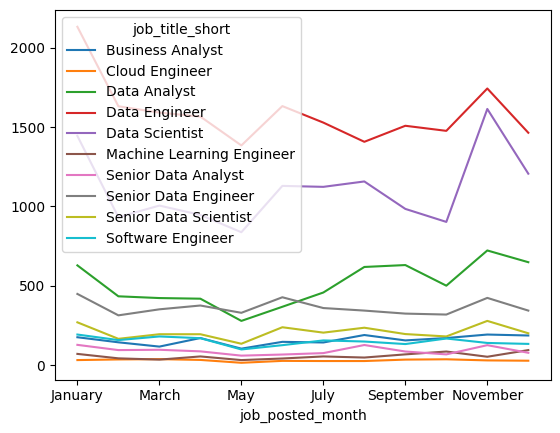

In [8]:
df_india_pivot.plot(kind='line')

In [17]:
top_3 = df_india['job_title_short'].value_counts().head(3)
top_3 = top_3.index.to_list()
top_3

['Data Engineer', 'Data Scientist', 'Data Analyst']

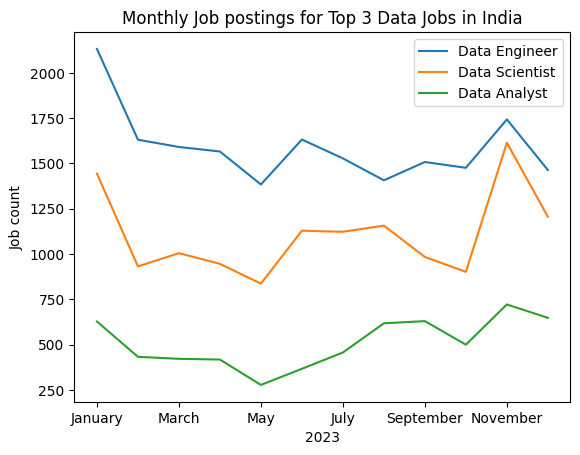

In [19]:
import matplotlib.pyplot as plt

df_india_pivot[top_3].plot(kind='line')
plt.title("Monthly Job postings for Top 3 Data Jobs in India")
plt.xlabel("2023")
plt.ylabel("Job count")
plt.legend()
plt.show()